In [1]:
from google.colab import files
uploaded = files.upload()


Saving TCS_stock_history.csv to TCS_stock_history.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("TCS_stock_history.csv")
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [5]:
df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [6]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')


In [8]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [9]:
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
correlation = df.corr()
correlation


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


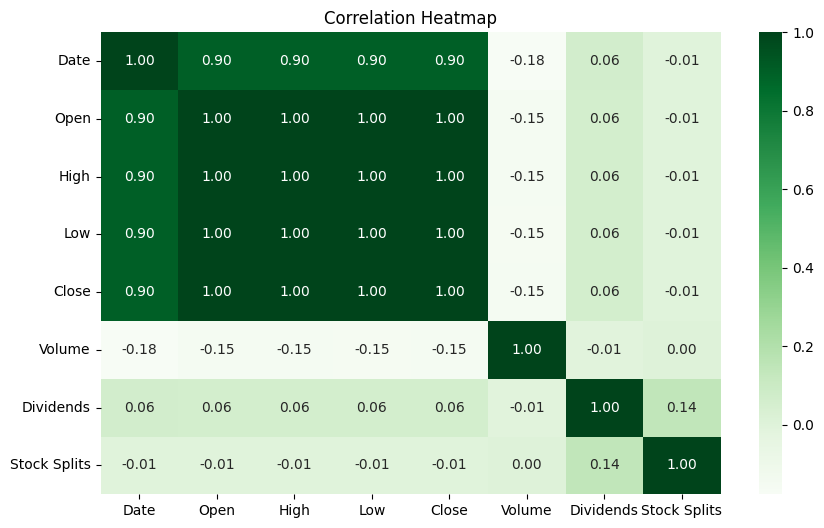

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


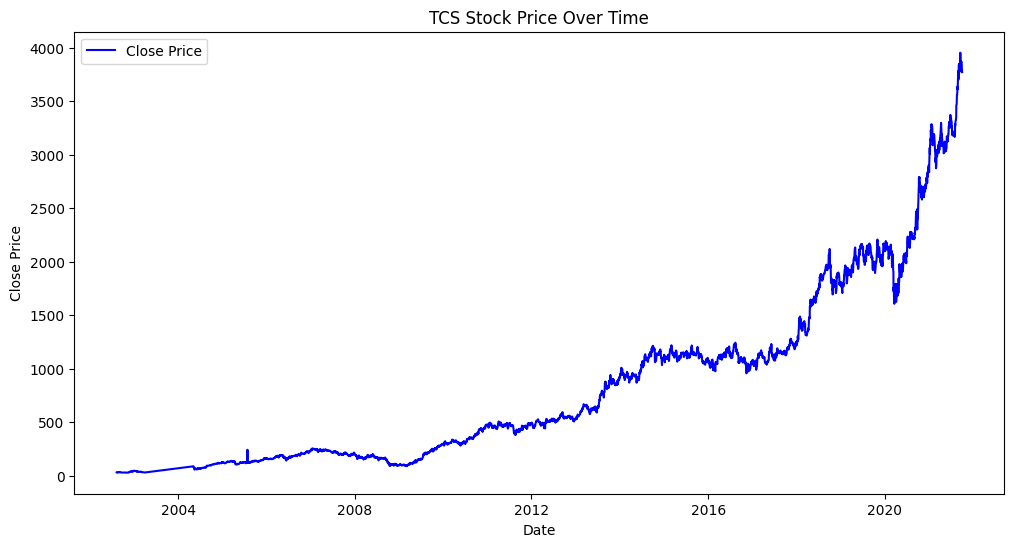

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price Over Time')
plt.legend()
plt.show()


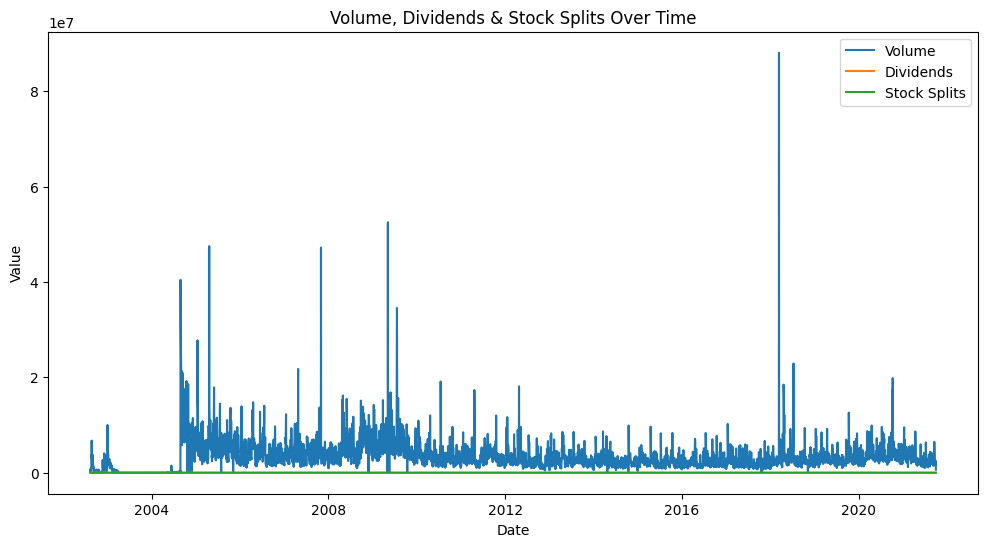

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.plot(df['Date'], df['Dividends'], label='Dividends')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends & Stock Splits Over Time')
plt.legend()
plt.show()


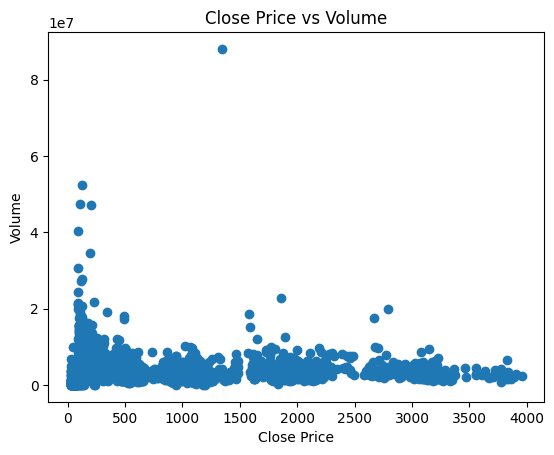

In [14]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs Volume')
plt.show()


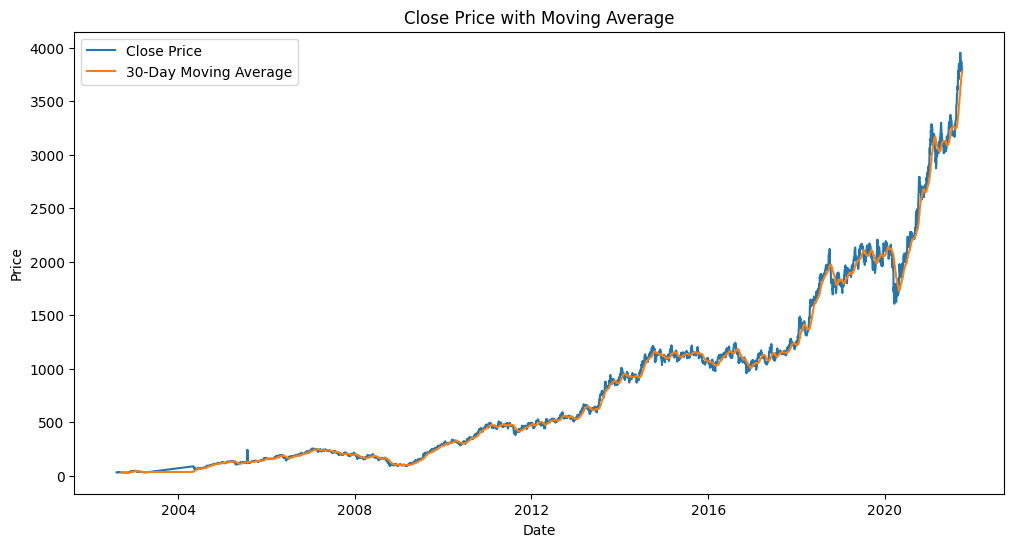

In [15]:
df['MA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA30'], label='30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Average')
plt.legend()
plt.show()


In [16]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek


In [17]:
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)


In [18]:
X = df[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]
y = df['Close']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(X_test)


In [23]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 54.649334140627445
R2 Score: 0.9999224414309594


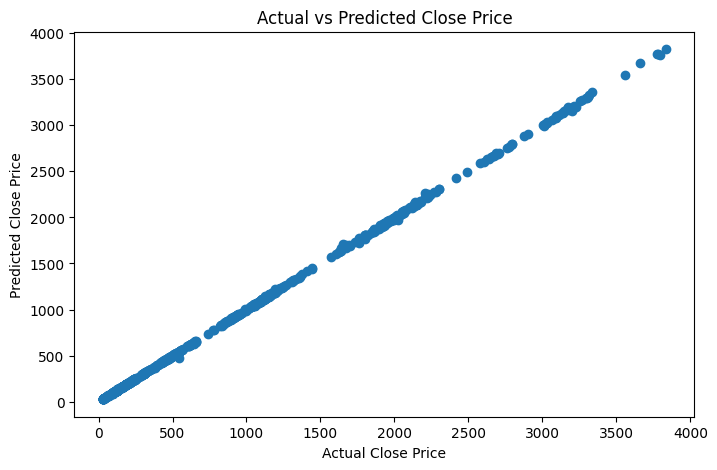

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.show()


In [25]:
import pickle

with open("TCS_Stock_Predictor.pkl", "wb") as file:
    pickle.dump(model, file)
